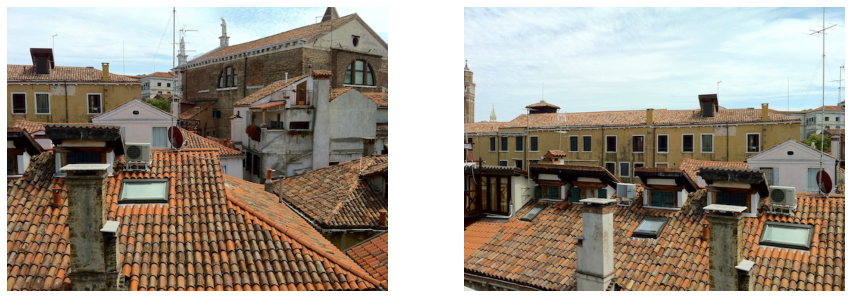

In [2]:
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import cv2

# img1 = mpimg.imread('images/roofs1.jpg', cv2.IMREAD_ANYCOLOR )
# img2 = mpimg.imread('images/roofs2.jpg', cv2.IMREAD_ANYCOLOR )

img1 = mpimg.imread('images/panorama_image1_big.jpg', cv2.IMREAD_ANYCOLOR )
img2 = mpimg.imread('images/panorama_image2_big.jpg', cv2.IMREAD_ANYCOLOR )

fig, ax = plt.subplots(1, 2, figsize=(15, 12))

ax[0].imshow(img1)
ax[0].axis('off')  
# ax[1].set_title('1')
ax[1].imshow(img2)
ax[1].axis('off')  
# ax[1].set_title('2')

top = int(img2.shape[0])
bottom = top
right = int(img2.shape[1])
left = right

img1 = cv2.copyMakeBorder(img1, top, bottom, left, right, cv2.BORDER_CONSTANT, None, 0)
img2 = cv2.copyMakeBorder(img2, top, bottom, left, right, cv2.BORDER_CONSTANT, None, 0)


In [124]:
import cv2 
import matplotlib.pyplot as plt

img1_g = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_g = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1_g,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2_g,None)

# brute force matching, takes the descriptor of one feature i#  first set and this is matched with
# all other features in second set using some distance calculation. The closest one is returned.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1, descriptors_2)

matches = sorted(matches, key = lambda x:x.distance)

(-0.5, 2399.5, 1799.5, -0.5)

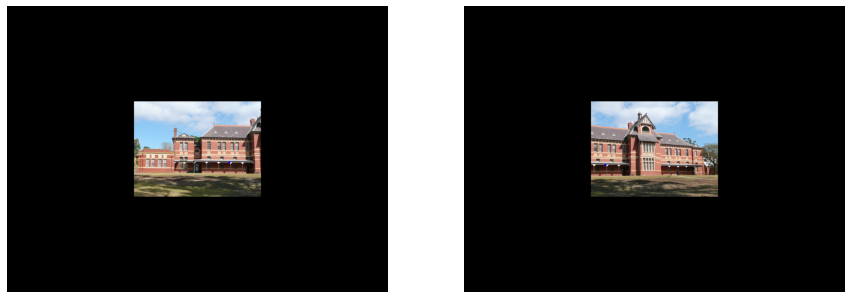

In [125]:
# Access coordinates on conjugate points

idx_query = matches[0].queryIdx
idx_train = matches[0].trainIdx

x_1 = int(keypoints_1[idx_query].pt[0])
y_1 = int(keypoints_1[idx_query].pt[1])

x_2 = int(keypoints_2[idx_train].pt[0])
y_2 = int(keypoints_2[idx_train].pt[1])

# image1 = cv2.circle(img1, (x_1, y_1), radius=7, color=(0, 0, 255), thickness=-1)

# image2 = cv2.circle(img2, (x_2, y_2), radius=7, color=(0, 0, 255), thickness=-1)

fig, ax = plt.subplots(1, 2, figsize=(15, 12))

ax[0].imshow(image1)
ax[0].axis('off')  
# ax[1].set_title('1')
ax[1].imshow(image2)
ax[1].axis('off')  
# ax[1].set_title('2')


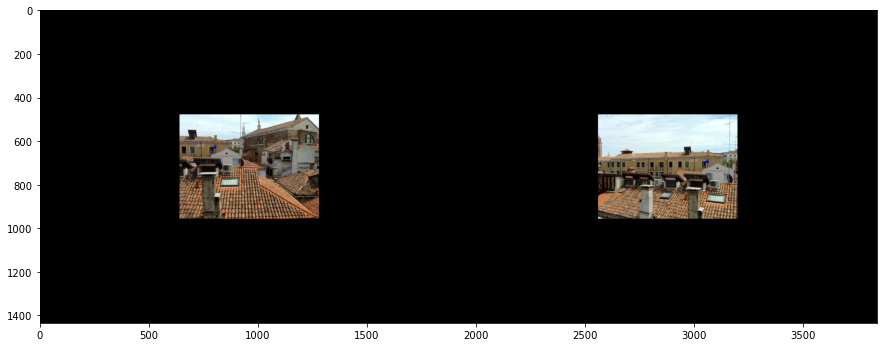

In [101]:
# Draw some matches with automatic drawMatches function
img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:0], img2, flags=2)

plt.figure(figsize=(15,12))
plt.imshow(img3),
plt.show()

In [127]:
# Homography computation
import numpy as np 
idx_query = matches[0].queryIdx
idx_train = matches[0].trainIdx

pts_1 = np.array([[keypoints_1[idx_query].pt[0], keypoints_1[idx_query].pt[1]]])
pts_2 = np.array([[keypoints_2[idx_train].pt[0], keypoints_2[idx_train].pt[1]]])

numberOfPoints = 10
for x in range(numberOfPoints):
    idx_query = matches[x].queryIdx
    idx_train = matches[x].trainIdx
    
    pts_1 = np.concatenate((pts_1, [[keypoints_1[idx_query].pt[0], keypoints_1[idx_query].pt[1]]]))
    pts_2 = np.concatenate((pts_2, [[keypoints_2[idx_train].pt[0], keypoints_2[idx_train].pt[1]]]))

h, status = cv2.findHomography(pts_1, pts_2, cv2.RANSAC, 10.0)


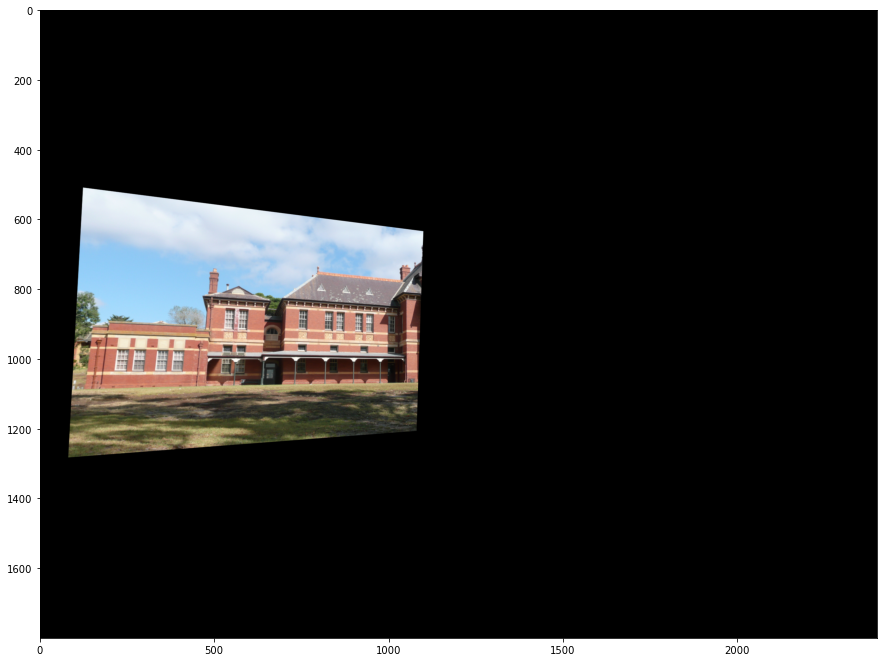

In [131]:
# Warped image
img_warped = cv2.warpPerspective(img1, h, (img1.shape[1],img1.shape[0]))

plt.figure(figsize=(15,12))
plt.imshow(img_warped),
plt.show()



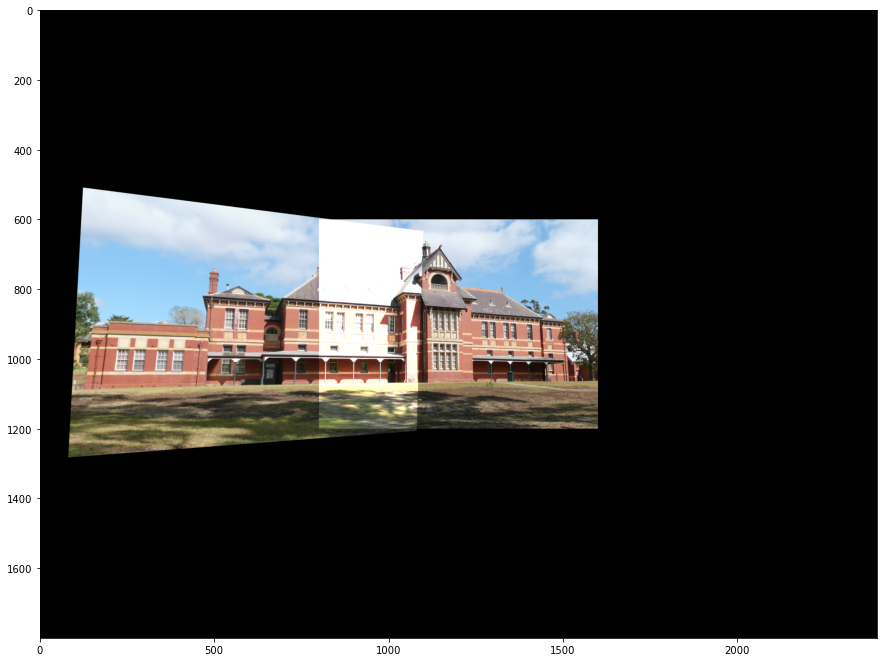

In [132]:
# Mosaice with the other image
img_out = cv2.add(img2, img_warped)

plt.figure(figsize=(15,12))
plt.imshow(img_out),
plt.show()